In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

DATA SET INFORMATION:
    
The dataset consists of feature vectors belonging to 4571 sessions.
Dataset contains 8 columns  date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue.There are total 3 categorical columns and 5 numerical columns.



ATTRIBUTE INFORMATION:

Raw metrics:
1.Impressions - Number of times the ad was shown
2.Clicks - Number of times the ad clicked shown
3.Cost - Amount spent to show ad
4.Conversions - Number of transactions received (higher the better)
5.Revenue - Total value of transactions received (higher the better)

Efficiency metrics: 
Needs to be calculated and are based on raw metrics
CTR  - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)
CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)
CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)
ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent)

    


In [2]:
data_raw=pd.read_csv("https://s3.amazonaws.com/backup.deltax.com/dump/data.csv")

In [3]:
data_raw.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-08-01,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-08-01,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-08-01,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-08-01,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-08-01,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


The above data is pre processed in Microsoft Power Bi and converted into a CSV file.

In [4]:
data=pd.read_csv('ad_campaign.csv')

Extra columns such as Year,Quarter,month,day,Week_Even,Weekday and the Efficiency metrics are calculated

In [5]:
data.head(3)

,Year,Quarter,Month,Day,Week_Even,Weekday,ADGROUP,AD,CLICKS,CONVERSIONS,COST,IMPRESSIONS,CPA,CPC,CTR,REVENUE,ROI
0,2020,Qtr 3,August,1,ODD,Saturday,adgroup 1,ad 1,6,0,0.08,24,0.000,0.013,25.00%,0,0
1,2020,Qtr 3,August,1,ODD,Saturday,adgroup 1,ad 10,2,0,0.02,5,0.000,0.010,40.00%,0,0
2,2020,Qtr 3,August,1,ODD,Saturday,adgroup 1,ad 2,126,4,1.29,247,0.322,0.010,51.00%,926,718


In [6]:
data['date']=data_raw['date']

Checking for NA and NULL values


There is no requirement of imputation for missing values since there are Zero missing and NA values.

In [7]:
data.isnull().sum()

Year           0
Quarter        0
Month          0
Day            0
Week_Even      0
Weekday        0
ADGROUP        0
AD             0
CLICKS         0
CONVERSIONS    0
COST           0
IMPRESSIONS    0
CPA            0
CPC            0
CTR            0
REVENUE        0
ROI            0
date           0
dtype: int64

In [8]:
data.isna().sum()

Year           0
Quarter        0
Month          0
Day            0
Week_Even      0
Weekday        0
ADGROUP        0
AD             0
CLICKS         0
CONVERSIONS    0
COST           0
IMPRESSIONS    0
CPA            0
CPC            0
CTR            0
REVENUE        0
ROI            0
date           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237 entries, 0 to 4236
Data columns (total 18 columns):
Year           4237 non-null int64
Quarter        4237 non-null object
Month          4237 non-null object
Day            4237 non-null int64
Week_Even      4237 non-null object
Weekday        4237 non-null object
ADGROUP        4237 non-null object
AD             4237 non-null object
CLICKS         4237 non-null int64
CONVERSIONS    4237 non-null int64
COST           4237 non-null float64
IMPRESSIONS    4237 non-null int64
CPA            4237 non-null float64
CPC            4237 non-null float64
CTR            4237 non-null object
REVENUE        4237 non-null int64
ROI            4237 non-null int64
date           4237 non-null object
dtypes: float64(3), int64(7), object(8)
memory usage: 595.9+ KB


data.describe() shows the statistical information about numerical columns.

1.From the Average and Maximum values of columns clicks,conversions,cost,impressions and revenue.It is observed that the data is positively skewed and log or any other transformation methods needs to be applied for normal or Guassian distribution of the data.This data serves as test/train data for ML algorithms which is out of scope for the project.


2.Standard deviation of revenue is far greater than mean.This signifies the spread of the data is far away from the mean.

In [10]:
data.describe()

,Year,Day,CLICKS,CONVERSIONS,COST,IMPRESSIONS,CPA,CPC,REVENUE,ROI
count,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000
mean,2020.313901,15.524664,46.757376,1.444654,3.021621,99.938164,0.600570,0.063672,250.142082,164.710408
std,0.464132,8.798160,110.038510,5.798885,15.629210,217.927633,2.125817,0.146050,1226.192008,856.608221
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,8.000000,2.000000,0.000000,0.040000,6.000000,0.000000,0.011000,0.000000,0.000000
50%,2020.000000,16.000000,7.000000,0.000000,0.210000,17.000000,0.000000,0.016000,0.000000,0.000000
75%,2021.000000,23.000000,41.000000,1.000000,1.410000,90.000000,0.246000,0.059000,99.000000,43.000000
max,2021.000000,31.000000,1874.000000,100.000000,572.020000,3447.000000,57.450000,3.810000,26713.000000,24900.000000


Variance of the numerical columns is very high.Generally high variance data is considered as bad data for ML algorithms.Once the tranformation methods are applied for normal distribution variance of the data will be reduced drastically.

In [11]:
data.var()

Year           2.154181e-01
Day            7.740762e+01
CLICKS         1.210847e+04
CONVERSIONS    3.362707e+01
COST           2.442722e+02
IMPRESSIONS    4.749245e+04
CPA            4.519099e+00
CPC            2.133070e-02
REVENUE        1.503547e+06
ROI            7.337776e+05
dtype: float64

Below Heat map and data.corr() shows the correlation between the numerical columns.Below points are observed from the data

1.High positively correlated columns are found to be Clicks with Revenue,Impressions and conversions with above 0.8

2.High positively correlated columns are found to be Conversions with Revenue,Impressions with above 0.8.Increase in clicks,impressions and conversions has high probablity of revenue generation.

3.Cost is positively correlated to Revenue with 0.57 value which is relatively less compared to the above correaltion index values.

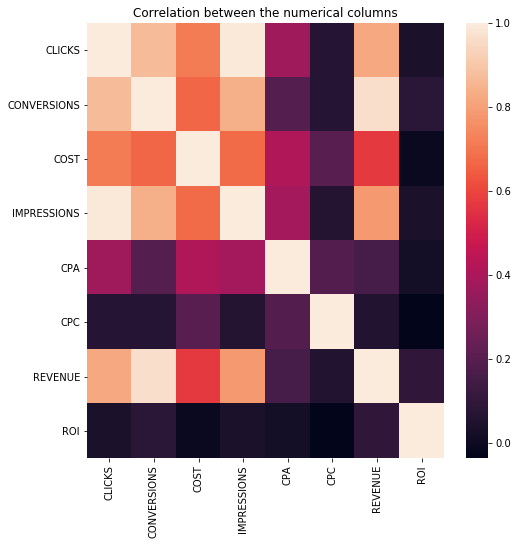

In [12]:
fig=plt.figure(figsize=(8,8))
plt.title('Correlation between the numerical columns')
ax=fig.gca()
data_heat=data.drop(['Year','Day'],axis=1)
sns.heatmap(data_heat.corr(),ax=ax)

In [13]:
data_heat.corr()

,CLICKS,CONVERSIONS,COST,IMPRESSIONS,CPA,CPC,REVENUE,ROI
CLICKS,1.000000,0.872045,0.714649,0.988195,0.370648,0.068219,0.820225,0.038243
CONVERSIONS,0.872045,1.000000,0.667618,0.840690,0.192253,0.070085,0.963719,0.081727
COST,0.714649,0.667618,1.000000,0.680405,0.415433,0.201348,0.574370,-0.007120
IMPRESSIONS,0.988195,0.840690,0.680405,1.000000,0.387098,0.064009,0.783461,0.039024
CPA,0.370648,0.192253,0.415433,0.387098,1.000000,0.187694,0.157350,0.020793
CPC,0.068219,0.070085,0.201348,0.064009,0.187694,1.000000,0.060546,-0.034985
REVENUE,0.820225,0.963719,0.574370,0.783461,0.157350,0.060546,1.000000,0.095306
ROI,0.038243,0.081727,-0.007120,0.039024,0.020793,-0.034985,0.095306,1.000000


OUTLIER DETECTION.

Many outliers can be detected in REVENUE,COST,CLICKS and IMPRESSIONS.

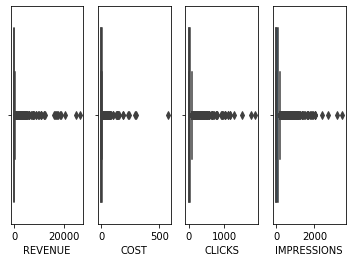

In [14]:
fig,axs=plt.subplots(ncols=4)
sns.boxplot(data.REVENUE,ax=axs[0])
sns.boxplot(data.COST,ax=axs[1])
sns.boxplot(data.CLICKS,ax=axs[2])
sns.boxplot(data.IMPRESSIONS,ax=axs[3])


Below Count plot shows the number of times different ads were shown to different audience groups 1,2,3 and 4.

1.Clearly Ad group 3 and Ad group 4 have highest number of ads shown followed by adgroup2 and adgroup 4


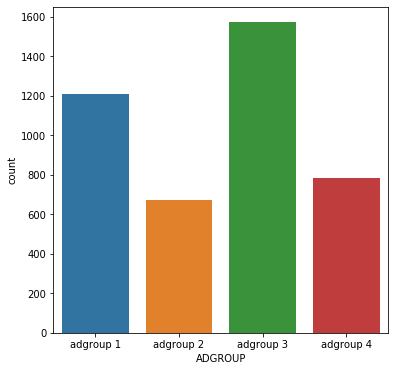

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(data.ADGROUP)


TOP 5 REVENUE BY AD

In [16]:
df=pd.pivot_table(data=data,index='AD',values=['REVENUE','COST'],aggfunc=np.sum)
df.sort_values('REVENUE').tail(5)

,COST,REVENUE
AD,,
ad 20,78.02,52028
ad 19,94.42,52194
ad 28,280.22,60420
ad 6,570.82,86632
ad 2,2080.82,136525


Below is scatter plot between COST and REVENUE for different ads.

1.Filters are applied on the scatter plot for Total Revenue generated greater than 30000

2.Size of the bubble is directly proportional to the total cost of the ad.Lower the size of the bubble lower is the cost.

3.AD 2 has the highest revenue generated .It is also the ad where highest amount is spent.

4.AD 20 and 28 has the least cost while AD 32 has high cost close to 1250 where the revenue is close to 40k.

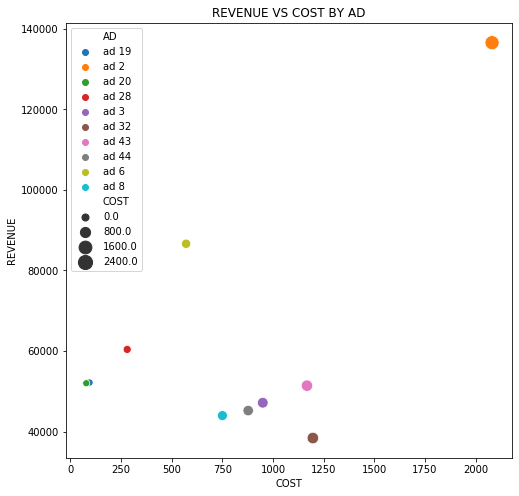

In [17]:
df1=data.groupby(['AD'],as_index=False)['REVENUE'].sum()
df2=data.groupby(['AD'],as_index=False)['COST'].sum()
df3= pd.merge(df1,df2,on='AD',how='inner')
df4=df3[df3['REVENUE']>30000]
plt.figure(figsize=(8,8))
plt.title('REVENUE VS COST BY AD')
sns.scatterplot(df4.COST,df4.REVENUE,hue=df4.AD,size=df4.COST,sizes=(50,200))

Top 10 least REVENUE GENERATING ADS

In [18]:
df3.sort_values('REVENUE').head(10)

,AD,REVENUE,COST
42,ad 48,0,1.09
30,ad 37,103,7.00
45,ad 50,106,0.53
29,ad 36,118,1.10
53,ad 58,136,1.48
27,ad 34,238,22.47
48,ad 53,257,5.52
16,ad 24,321,6.89
57,ad 61,777,19.68
47,ad 52,947,7.81


Below Bar plot shows the Cost and also Revenue generated by different ad groups.

1.Clearly Ad group1 and Ad group3 generated almost 90-95 % of the revenue.
2.Adgroup2 and Adgroup4 have generated  negligible amount even though the number of ads shown were 600 and 800 approximately.
3.Adgroup 1 and 3 generated almost equal revenue.
4.The amount of money(COST) spent for each ad in adgroup 1 is more compared to ad group 3 even though adgroup1 has 30% less ads compared to adgroup3.
5.Adgroup 2 and Adgroup4 are least interested in the ads shown.

Text(0.5, 1.0, 'COST BREAKDOWN BY ADGROUP')

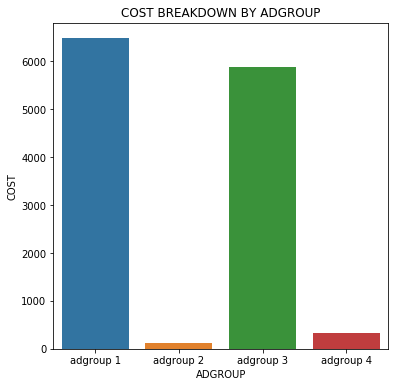

In [19]:
plt.figure(figsize=(6,6))
df=pd.pivot_table(data=data,index='ADGROUP',values='COST',aggfunc=np.sum)
sns.barplot(df.index,df['COST'])
plt.title("COST BREAKDOWN BY ADGROUP")

Text(0.5, 1.0, 'REVENUE BREAKDOWN BY ADGROUP')

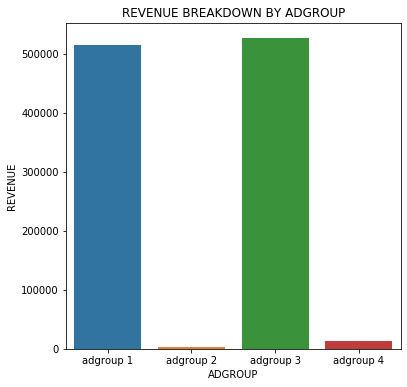

In [20]:
plt.figure(figsize=(6,6))
df=pd.pivot_table(data=data,index='ADGROUP',values='REVENUE',aggfunc=np.sum)

sns.barplot(df.index,df['REVENUE'])
plt.title("REVENUE BREAKDOWN BY ADGROUP")


Converting the data type of Date column 

In [21]:
print(data['date'].dtype)
data['date']=pd.to_datetime(data['date'])
print(data['date'].dtype)

object
datetime64[ns]


In [22]:
Below Bar plot shows the revenue genarated in months.

1.September,October and Novermber has highest revenue generation.

2.January has the lowest Revenue

SyntaxError: invalid syntax (<ipython-input-22-898ba3e7b61b>, line 1)

In [ ]:
df=pd.pivot_table(data=data,index='Month',values='REVENUE',aggfunc=np.sum)
plt.figure(figsize=(6,6))
sns.barplot(df.index,df['REVENUE'])

Below Bar plot shows the revenue genarated in days for 1 to 31.

1.Clearly Day 8,9,10,11,26,27 and 28 have total revenue greater thena 40K.It is highlt probable that the ads shown and money spent will be highly succcessful on these days.

2.In the second Bar plot of COST.Money spent on days 8,9,10 and 11 is far less compared to money spent on 26,27 and 28.

In [ ]:
df=pd.pivot_table(data=data,index='Day',values='REVENUE',aggfunc=np.sum)
plt.figure(figsize=(6,6))
sns.barplot(df.index,df['REVENUE'])

In [ ]:
df=pd.pivot_table(data=data,index='Day',values='COST',aggfunc=np.sum)
plt.figure(figsize=(6,6))
sns.barplot(df.index,df['COST'])

Below bar plot shows the revenue generated on days of week.

1.Surprisingly Thursday has the highest total revenue while Monday has the least 

In [ ]:
df=pd.pivot_table(data=data,index='Weekday',values='REVENUE',aggfunc=np.sum)
sns.barplot(df.index,df.REVENUE)

Below Bar graph shows the revenue generated in each Quarter.Clearly Q4 has the highest and Q1 has the least.

In [ ]:
df=pd.pivot_table(data=data,index='Quarter',values='REVENUE',aggfunc=np.sum)
sns.barplot(df.index,df['REVENUE'])

Below Bar Graph shows that Revenue generated is 33.33 % MORE when the week number is ODD.

In [ ]:
df=pd.pivot_table(data=data,index='Week_Even',values='REVENUE',aggfunc=np.sum)
sns.barplot(df.index,df['REVENUE'])

Below Plot shows the revenue generated from August 2020 to February 2021.

1.It can be seen that the September,October and November has the highest Revenue generated .

2.These sudden spikes in Revenue generation act as outliers.

3.In the remaining months it is seen that the average revenue generated per day is approximately 2500.

4.In the month of September and october the amount of money spent for the ads is extremely less compared to November.Greater ROI is seen in September and October compared to November.

5.From December to February respective columns appear to be a straight line as there is less amount spent leads to less impressions,less impressions means less clicks ,less clicks means less conversions and less revenue.Slight increase in the cost increased the revenue generation for the ads.

In [ ]:
fig,axs=plt.subplots(nrows=4)
fig.set_size_inches(12, 8)
sns.lineplot(data.date,data.REVENUE,ax=axs[0])
sns.lineplot(data.date,data.COST,ax=axs[1])
sns.lineplot(data.date,data.CLICKS,ax=axs[2])
sns.lineplot(data.date,data.IMPRESSIONS,ax=axs[3])

CONCLUSIONS:


1.adgroup 1 and 3 are high revenue generating audience groups .Therefore spending more amount of money on these groups leads to more revenue.

2.Christmas and New year time has least revenue.

3.September,October and November have seen the biggest spikes in revenue which is maybe due to the festivals if the data is based on Indian population.

4.ODD week number has generated 33.33 % more Revenue than Even week number.

5.AD 2 has the highest total revenue with 1.35 LAC while AD 48 has zero total revenue.

6.Many other data analysis can be done with the help dashboard made in power.Q and A is useful in asking meaningful business related queries.    